# ПРОГНОЗИРОВАНИЕ №8.7 - ПРИБЫЛЬ (КЛАССИФИКАЦИЯ на целом фрейме данных  c выборкой до 6000 Revenue на большем количестве деревьев)

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmdnq_los
  JVM stdout: /tmp/tmpmdnq_los/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmdnq_los/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 14 days
H2O_cluster_name:,H2O_from_python_unknownUser_fsg0v9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV8.csv'
df = h2o.import_file(file)
df = df.drop('C1')
df = df.drop('Zip')
df = df.drop('Units')
df = df.drop('Revenue_T')
df = df.drop('abc_xyz_class')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete,Revenue_cat
Natura,12,14,YouthYouthNotCompete,Revenue_cat #5
Natura,12,14,YouthYouthNotCompete,Revenue_cat #5
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3


In [4]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [5]:
train

Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete,Revenue_cat
Natura,12,14,YouthYouthNotCompete,Revenue_cat #5
Natura,12,14,YouthYouthNotCompete,Revenue_cat #5
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3


In [6]:
valid

Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete,Revenue_cat
Aliqui,12,2,RuralSelectNotCompete,Revenue_cat #9
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
Natura,12,69,RuralProductivityNotCompete,Revenue_cat #3
Natura,12,69,RuralProductivityNotCompete,Revenue_cat #3
Natura,12,69,RuralProductivityNotCompete,Revenue_cat #3
VanArsdel,12,55,UrbanConvenienceNotCompete,Revenue_cat #9
Natura,12,70,RuralProductivityNotCompete,Revenue_cat #3
Aliqui,12,13,MixAll SeasonNotCompete,Revenue_cat #5
Aliqui,12,13,MixAll SeasonNotCompete,Revenue_cat #5


In [7]:
unseen

Manufacturer,MonthNo,Model_id_number,CategoryInSegmentInCompete,Revenue_cat
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
Natura,12,10,YouthYouthNotCompete,Revenue_cat #3
VanArsdel,12,55,UrbanConvenienceNotCompete,Revenue_cat #9
Natura,12,70,RuralProductivityNotCompete,Revenue_cat #3
Aliqui,12,13,MixAll SeasonNotCompete,Revenue_cat #5
Aliqui,12,24,UrbanExtremeNotCompete,Revenue_cat #9
Aliqui,12,8,RuralSelectNotCompete,Revenue_cat #9
Aliqui,12,17,UrbanConvenienceNotCompete,Revenue_cat #10
Aliqui,12,15,UrbanExtremeNotCompete,Revenue_cat #10


# Тренировка модели

In [8]:
from h2o.estimators import H2OGradientBoostingEstimator

response_col = "Revenue_cat"

distribution = "multinomial"

predictors = ["Manufacturer","MonthNo","Model_id_number", "CategoryInSegmentInCompete"]

gbm = H2OGradientBoostingEstimator(nfolds=3,
                                   ntrees=50,
                                   distribution=distribution)

gbm.train(x=predictors,
          y=response_col,
          training_frame=train,
          validation_frame=valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1696926786466_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 500                         225594                 5            5            5             23            32            31.244

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.24924099893962653
RMSE: 0.4992404219808594
LogLoss: 0.7469169867490432
Mean Per-Class Error: 0.24381178632743294
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Revenue_cat #1    Revenue_cat #10    Revenue_cat #2    Revenue_cat #3    Revenue_cat #4    Revenue_cat #5    Revenue_cat #6    Revenue_cat #7    Revenue_cat #8    Revenue_cat #9    Error      Rate
----------------  -----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ---------  -----------------
41993             1                  2338              8                 0                 2                 0                 0                 0                 2                 0.0530173  2,351 / 44,344
4                 29026              122               149               52                313               189               273               1338              6960              0.244626   9,400 / 38,426
1559              0                  33657             4216              39                198               10                25                0                 43                0.153219   6,090 / 39,747
1713              0                  4995              31215             3677              373               88                175               146               50                0.264352   11,217 / 42,432
324               0                  923               1335              31801             8850              157               7                 152               55                0.270686   11,803 / 43,604
159               94                 715               1428              1906              32161             3470              36                278               118               0.203245   8,204 / 40,365
24                284                200               813               889               2068              35278             3383              765               600               0.203729   9,026 / 44,304
172               202                31                29                438               473               8461              24428             5886              610               0.400246   16,302 / 40,730
2                 303                13                403               53                637               1743              6140              30706             1735              0.264263   11,029 / 41,735
6                 4561               334               93                76                779               1391              2248              7824              28158             0.380735   17,312 / 45,470
45956             34471              43328             39689             38931             45854             50787             36715             47095             38331             0.243933   102,734 / 421,157

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.756067
2    0.926405
3    0.96469
4    0.978801
5    

In [9]:
confusion_matrix = gbm.confusion_matrix(train)
confusion_matrix

Revenue_cat #1,Revenue_cat #10,Revenue_cat #2,Revenue_cat #3,Revenue_cat #4,Revenue_cat #5,Revenue_cat #6,Revenue_cat #7,Revenue_cat #8,Revenue_cat #9,Error,Rate
41993.0,1.0,2338.0,8.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0530173,"2,351 / 44,344"
4.0,29026.0,122.0,149.0,52.0,313.0,189.0,273.0,1338.0,6960.0,0.2446260,"9,400 / 38,426"
1559.0,0.0,33657.0,4216.0,39.0,198.0,10.0,25.0,0.0,43.0,0.1532191,"6,090 / 39,747"
1713.0,0.0,4995.0,31215.0,3677.0,373.0,88.0,175.0,146.0,50.0,0.2643524,"11,217 / 42,432"
324.0,0.0,923.0,1335.0,31801.0,8850.0,157.0,7.0,152.0,55.0,0.2706862,"11,803 / 43,604"
159.0,94.0,715.0,1428.0,1906.0,32161.0,3470.0,36.0,278.0,118.0,0.2032454,"8,204 / 40,365"
24.0,284.0,200.0,813.0,889.0,2068.0,35278.0,3383.0,765.0,600.0,0.2037288,"9,026 / 44,304"
172.0,202.0,31.0,29.0,438.0,473.0,8461.0,24428.0,5886.0,610.0,0.4002455,"16,302 / 40,730"
2.0,303.0,13.0,403.0,53.0,637.0,1743.0,6140.0,30706.0,1735.0,0.2642626,"11,029 / 41,735"
6.0,4561.0,334.0,93.0,76.0,779.0,1391.0,2248.0,7824.0,28158.0,0.3807346,"17,312 / 45,470"


In [10]:
hit_ratio_table = gbm.hit_ratio_table() # <- Default: return training metrics
hit_ratio_table

k,hit_ratio
1,0.7560672
2,0.9264051
3,0.9646902
4,0.9788012
5,0.9916587
6,0.9955076
7,0.9982216
8,0.9992711
9,0.9996866
10,1.0


In [11]:
hit_ratio_table1 = gbm.hit_ratio_table(train=True,
                                       valid=True,
                                       xval=True)
hit_ratio_table1

{'train': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.756067
2    0.926405
3    0.96469
4    0.978801
5    0.991659
6    0.995508
7    0.998222
8    0.999271
9    0.999687
10   1,
 'valid': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.755999
2    0.924921
3    0.964419
4    0.978758
5    0.991536
6    0.995442
7    0.998318
8    0.999403
9    0.999723
10   1,
 'xval': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.753493
2    0.924451
3    0.963228
4    0.980091
5    0.99121
6    0.995899
7    0.9981
8    0.999283
9    0.999713
10   1}

In [12]:
mean_per_class_error = gbm.mean_per_class_error() # <- Default: return training metric
mean_per_class_error

0.24381178632743294

In [13]:
mean_per_class_error1 = gbm.mean_per_class_error(train=True,
                                                 valid=True,
                                                 xval=True)
mean_per_class_error1

{'train': 0.24381178632743294,
 'valid': 0.24378870605894032,
 'xval': 0.24626060077027329}

In [14]:
multinomial_auc_table = gbm.multinomial_auc_table() # <- Default: return training metric
multinomial_auc_table

"AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

In [15]:
multinomial_aucpr_table = gbm.multinomial_aucpr_table() # <- Default: return training metric
multinomial_aucpr_table

"AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

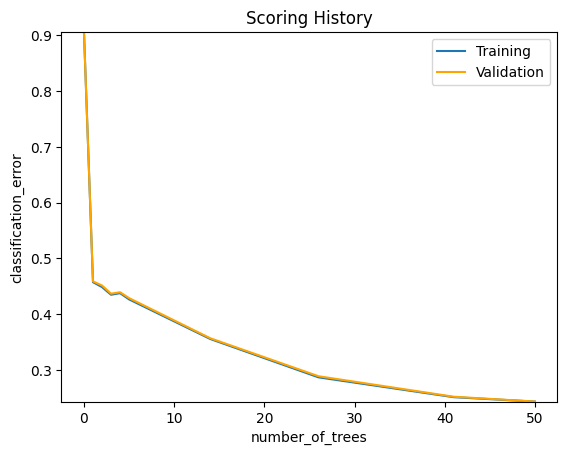

In [16]:
gbm.plot(metric="AUTO", timestep="AUTO")

# Сохранение модели

In [17]:
model_id = 'GBM_model_python_1696926786466_1'

model = h2o.get_model(model_id)
h2o.save_model(model, path = "./models")

'/home/jupyter/Diplom/models/GBM_model_python_1696926786466_1'